In [45]:
import math
import numpy as np

def softmax(x):
    """Compute softmax values for a list of numbers."""
    # Apply exponentiation to each element in the list
    exps = [math.exp(i) for i in x]
    # Sum all the exponentiated values
    sum_exps = sum(exps)
    # Divide each exponentiated value by the total sum to get probabilities
    return [j / sum_exps for j in exps]

def index_of_max(lst):
    """Return the index of the maximum value in the list."""
    return lst.index(max(lst))

# Example logits output from a transformer model's final layer
# Each logit corresponds to a token in the vocabulary
# These are raw scores and not yet a proper probability distribution
logits = np.array([0.2, 0.38, 0.59, -0.27, 1.37])

# Define temperature values for scaling logits
# Temperature < 1 sharpens the distribution (more confident)
# Temperature = 1 leaves distribution unchanged
# Temperature > 1 flattens the distribution (more exploratory)
temperature_less = 0.5
temperature_default = 1
temperature_more = 5

# Apply temperature scaling to the logits
# This modifies the distribution shape before softmax
logits_after_softmax_with_temperature_less_than_1 = logits / temperature_less
logits_after_softmax_with_temperature_equal_to_1 = logits / temperature_default
logits_after_softmax_with_temperature_more_than_1 = logits / temperature_more

# Apply softmax to scaled logits to get actual probability distributions
logits_after_softmax_less_than_1 = softmax(logits_after_softmax_with_temperature_less_than_1)
logits_after_softmax_equal_than_1 = softmax(logits_after_softmax_with_temperature_equal_to_1)
logits_after_softmax_more_than_1 = softmax(logits_after_softmax_with_temperature_more_than_1)

# Example:
# logits_after_softmax_equal_than_1 might output something like:
# [0.1329, 0.1591, 0.1963, 0.0830, 0.4283]

# (Optional / Commented out)
# Find the index of the highest probability token
# logit_index = index_of_max(logits_after_softmax_equal_than_1)

# Map the index back to the actual token using a vocabulary dictionary
# next_token = token_ids_to_token_dict[logit_index]
# print(next_token)  # Example: 'cream'


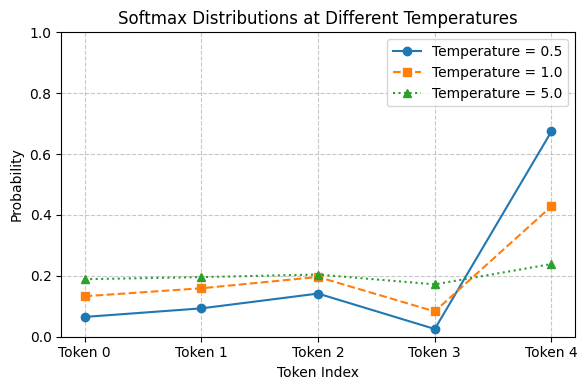

In [47]:
import matplotlib.pyplot as plt

# Create a new figure for the plot with specified size
plt.figure(figsize=(6, 4))

# Create labels for the x-axis corresponding to token indices
x_labels = [f"Token {i}" for i in range(len(logits_after_softmax_less_than_1))]

# Plot softmax distribution when temperature = 0.5
# This distribution is sharper (more confident)
plt.plot(
    logits_after_softmax_less_than_1, 
    marker='o', linestyle='-', 
    label='Temperature = 0.5'
)

# Plot softmax distribution when temperature = 1.0
# This is the base distribution (no scaling)
plt.plot(
    logits_after_softmax_equal_than_1, 
    marker='s', linestyle='--', 
    label='Temperature = 1.0'
)

# Plot softmax distribution when temperature = 5.0
# This distribution is flatter (more exploratory)
plt.plot(
    logits_after_softmax_more_than_1, 
    marker='^', linestyle=':', 
    label='Temperature = 5.0'
)

# Set plot title and axis labels
plt.title("Softmax Distributions at Different Temperatures")
plt.xlabel("Token Index")
plt.ylabel("Probability")

# Set y-axis range for better visualization
plt.ylim(0, 1)

# Add a grid with dashed lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-tick labels to show "Token 0", "Token 1", etc.
plt.xticks(range(len(logits_after_softmax_less_than_1)), x_labels)

# Display legend to differentiate between curves
plt.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()
